# Homework 6
## CPE 490 590
## Instructor: Rahul Bhadani


# 7. Markov Decision Process (45 Points)

### Part 1 and Part 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

class MarkovChain:
    def __init__(self, transition_matrix, states):
        """
        Initialize the Markov chain with transition matrix and state names.
        
        Args:
            transition_matrix: 2D numpy array where [i,j] is the probability of transitioning from state i to state j
            states: List of state names
        """
        self.transition_matrix = np.array(transition_matrix)
        self.states = states
        self.n_states = len(states)
        
        # Validate that each row sums to 1 (valid probability distribution)
        row_sums = np.sum(self.transition_matrix, axis=1)
        if not np.allclose(row_sums, np.ones(self.n_states)):
            print("Warning: Transition matrix rows don't sum to 1")
            print(f"Row sums: {row_sums}")
    
    def next_state(self, current_state_idx):
        """Generate the next state based on transition probabilities."""
        return np.random.choice(self.n_states, p=self.transition_matrix[current_state_idx])
    
    def generate_sequence(self, start_state_idx, length):
        """Generate a sequence of states starting from start_state."""
        current_state = start_state_idx
        sequence = [current_state]
        
        for _ in range(length-1):
            next_state_idx = self.next_state(current_state)
            sequence.append(next_state_idx)
            current_state = next_state_idx
            
        return sequence

In [4]:
# Transition matrix under action as
transition_matrix = np.array([
    [0.6, 0.2, 0.2],
    [0.3, 0.6, 0.1],
    [0.3, 0.7, 0.0]
])

# Initialize the Markov chain
mc = MarkovChain(transition_matrix, states=["s0", "s1", "s2"])

# Example: Generate a sequence of 10 states starting from State 0
sequence = mc.generate_sequence(0, 10)
print("Generated sequence:", [mc.states[i] for i in sequence])


# Simulate the Markov chain for many steps to find steady state
def simulate_steady_state(mc, start_state=0, num_steps=100000):
    current = start_state
    state_counts = {i: 0 for i in range(mc.n_states)}
    
    for _ in range(num_steps):
        state_counts[current] += 1
        current = mc.next_state(current)
    
    # Convert counts to probabilities
    total = sum(state_counts.values())
    steady_state = {mc.states[i]: count/total for i, count in state_counts.items()}
    return steady_state

# Calculate steady state distribution
steady_state = simulate_steady_state(mc)
print("\nSteady state distribution (simulated) for action a:")
for state, prob in steady_state.items():
    print(f"State {state}: {prob:.4f}")

# Theoretical steady state calculation using linear algebra
def calculate_steady_state(transition_matrix):
    """Calculate the steady state distribution analytically."""
    # For a Markov chain with transition matrix P, the steady state π satisfies π = πP
    # This means π(P - I) = 0, plus we need the constraint that sum(π) = 1
    
    n = len(transition_matrix)
    A = np.vstack([np.transpose(transition_matrix) - np.eye(n), np.ones(n)])
    b = np.zeros(n+1)
    b[-1] = 1
    
    # Solve the system of equations
    try:
        steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
        return steady_state
    except np.linalg.LinAlgError:
        return None

# Calculate theoretical steady state
theoretical_steady_state = calculate_steady_state(transition_matrix)
if theoretical_steady_state is not None:
    print("\nTheoretical steady state distribution for action a:")
    for i, prob in enumerate(theoretical_steady_state):
        print(f"State {mc.states[i]}: {prob:.4f}")

Generated sequence: ['s0', 's0', 's0', 's0', 's0', 's0', 's0', 's0', 's1', 's0']

Steady state distribution (simulated) for action a:
State s0: 0.4281
State s1: 0.4426
State s2: 0.1293

Theoretical steady state distribution for action a:
State s0: 0.4286
State s1: 0.4416
State s2: 0.1299


In [6]:
# Transition matrix under action as
transition_matrix = np.array([
    [0.3, 0.4, 0.3],
    [0.5, 0.1, 0.4],
    [0.2, 0.8, 0.0]
])

# Initialize the Markov chain
mc = MarkovChain(transition_matrix, states=["s0", "s1", "s2"])

# Example: Generate a sequence of 10 states starting from State 0
sequence = mc.generate_sequence(0, 10)
print("Generated sequence:", [mc.states[i] for i in sequence])


# Simulate the Markov chain for many steps to find steady state
def simulate_steady_state(mc, start_state=0, num_steps=100000):
    current = start_state
    state_counts = {i: 0 for i in range(mc.n_states)}
    
    for _ in range(num_steps):
        state_counts[current] += 1
        current = mc.next_state(current)
    
    # Convert counts to probabilities
    total = sum(state_counts.values())
    steady_state = {mc.states[i]: count/total for i, count in state_counts.items()}
    return steady_state

# Calculate steady state distribution
steady_state = simulate_steady_state(mc)
print("\nSteady state distribution (simulated) for action c:")
for state, prob in steady_state.items():
    print(f"State {state}: {prob:.4f}")

# Theoretical steady state calculation using linear algebra
def calculate_steady_state(transition_matrix):
    """Calculate the steady state distribution analytically."""
    # For a Markov chain with transition matrix P, the steady state π satisfies π = πP
    # This means π(P - I) = 0, plus we need the constraint that sum(π) = 1
    
    n = len(transition_matrix)
    A = np.vstack([np.transpose(transition_matrix) - np.eye(n), np.ones(n)])
    b = np.zeros(n+1)
    b[-1] = 1
    
    # Solve the system of equations
    try:
        steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
        return steady_state
    except np.linalg.LinAlgError:
        return None

# Calculate theoretical steady state
theoretical_steady_state = calculate_steady_state(transition_matrix)
if theoretical_steady_state is not None:
    print("\nTheoretical steady state distribution for action c:")
    for i, prob in enumerate(theoretical_steady_state):
        print(f"State {mc.states[i]}: {prob:.4f}")

Generated sequence: ['s0', 's1', 's0', 's0', 's2', 's1', 's0', 's1', 's0', 's0']



Steady state distribution (simulated) for action c:
State s0: 0.3509
State s1: 0.3886
State s2: 0.2605

Theoretical steady state distribution for action c:
State s0: 0.3515
State s1: 0.3879
State s2: 0.2606


### Part 3

In [7]:
import numpy as np
from copy import deepcopy

class MarkovDecisionProcess:
    def __init__(self, transition_matrices, rewards, states, actions, gamma=0.9):
        """
        Initialize the Markov Decision Process.
        
        Args:
            transition_matrices: List of 2D numpy arrays, one for each action
                                where transition_matrices[a][i,j] is the probability 
                                of transitioning from state i to state j when taking action a
            rewards: 3D numpy array where rewards[s, a, s'] is the reward for taking action a 
                    in state s and transitioning to state s'
            states: List of state names
            actions: List of action names
            gamma: Discount factor for future rewards (between 0 and 1)
        """
        self.transition_matrices = [np.array(tm) for tm in transition_matrices]
        self.rewards = np.array(rewards)  # Now a 3D array [s, a, s']
        self.states = states
        self.actions = actions
        self.gamma = gamma
        self.n_states = len(states)
        self.n_actions = len(actions)
        
        # Validate transition matrices
        for a, tm in enumerate(self.transition_matrices):
            row_sums = np.sum(tm, axis=1)
            if not np.allclose(row_sums, np.ones(self.n_states)):
                print(f"Warning: Transition matrix for action {actions[a]} rows don't sum to 1")
                print(f"Row sums: {row_sums}")
    
    def next_state(self, current_state, action):
        """Generate the next state based on current state and action."""
        return np.random.choice(self.n_states, p=self.transition_matrices[action][current_state])
    
    def get_expected_reward(self, state, action):
        """
        Calculate the expected reward for a state-action pair.
        
        R(s,a) = ∑s' P(s'|s,a) * R(s,a,s')
        """
        expected_reward = 0
        for next_state in range(self.n_states):
            # Probability of transitioning to next_state
            prob = self.transition_matrices[action][state, next_state]
            # Reward for this transition
            reward = self.rewards[state, action, next_state]
            expected_reward += prob * reward
        
        return expected_reward
    
    def simulate_random_actions(self, start_state, n_steps):
        """
        Simulate taking random actions for n_steps steps, starting from start_state.
        
        Args:
            start_state: Index of the starting state
            n_steps: Number of steps to simulate
            
        Returns:
            history: List of (state, action, reward, next_state) tuples
            total_reward: Sum of rewards
            discounted_reward: Sum of discounted rewards
        """
        current_state = start_state
        history = []
        total_reward = 0
        discounted_reward = 0
        
        for step in range(n_steps):
            # Choose a random action
            action = np.random.randint(0, self.n_actions)
            
            # Calculate next state
            next_state = self.next_state(current_state, action)
            
            # Get reward for this state-action-next_state triple
            reward = self.rewards[current_state, action, next_state]
            
            # Record state, action, reward, next_state
            history.append((
                self.states[current_state], 
                self.actions[action], 
                reward, 
                self.states[next_state]
            ))
            
            # Update rewards
            total_reward += reward
            discounted_reward += reward * (self.gamma ** step)
            
            # Move to next state
            current_state = next_state
            
        return history, total_reward, discounted_reward

    def value_iteration(self, theta=0.0001, max_iterations=1000):
        """
        Perform value iteration to find the optimal value function and policy.
        
        Args:
            theta: Convergence threshold
            max_iterations: Maximum number of iterations
            
        Returns:
            optimal_values: Optimal value function
            optimal_policy: Optimal policy (mapping from state to action)
        """
        # Initialize value function
        V = np.zeros(self.n_states)
        
        # Initialize policy
        policy = np.zeros(self.n_states, dtype=int)
        
        for i in range(max_iterations):
            delta = 0
            
            # For each state
            for s in range(self.n_states):
                v = V[s]
                
                # Compute the value of each action in this state
                action_values = []
                
                for a in range(self.n_actions):
                    # Expected value of taking action a in state s
                    expected_value = 0
                    
                    for s_next in range(self.n_states):
                        # Add expected immediate reward and future rewards
                        transition_prob = self.transition_matrices[a][s, s_next]
                        immediate_reward = self.rewards[s, a, s_next]
                        expected_value += transition_prob * (immediate_reward + self.gamma * V[s_next])
                    
                    action_values.append(expected_value)
                
                # Select the action with the highest expected value
                best_action = np.argmax(action_values)
                best_value = action_values[best_action]
                
                # Update policy and value function
                policy[s] = best_action
                V[s] = best_value
                
                # Check convergence
                delta = max(delta, abs(v - V[s]))
            
            if delta < theta:
                print(f"Value iteration converged after {i+1} iterations.")
                break
        
        # Convert policy from indices to action names
        policy_names = [self.actions[a] for a in policy]
        
        return V, policy_names
    
    def policy_iteration(self, max_iterations=1000, policy_eval_theta=0.0001):
        """
        Perform policy iteration to find the optimal policy.
        
        Args:
            max_iterations: Maximum number of iterations
            policy_eval_theta: Convergence threshold for policy evaluation
            
        Returns:
            optimal_values: Optimal value function
            optimal_policy: Optimal policy (mapping from state to action)
        """
        # Initialize random policy
        policy = np.random.randint(0, self.n_actions, size=self.n_states)
        
        for i in range(max_iterations):
            # Policy evaluation
            V = self._evaluate_policy(policy, theta=policy_eval_theta)
            
            # Policy improvement
            policy_stable = True
            
            for s in range(self.n_states):
                old_action = policy[s]
                
                # Compute the value of each action in this state
                action_values = []
                
                for a in range(self.n_actions):
                    # Expected value of taking action a in state s
                    expected_value = 0
                    
                    for s_next in range(self.n_states):
                        # Add expected immediate reward and future rewards
                        transition_prob = self.transition_matrices[a][s, s_next]
                        immediate_reward = self.rewards[s, a, s_next]
                        expected_value += transition_prob * (immediate_reward + self.gamma * V[s_next])
                    
                    action_values.append(expected_value)
                
                # Select the action with the highest expected value
                best_action = np.argmax(action_values)
                
                # Update policy
                policy[s] = best_action
                
                # Check if policy changed
                if old_action != best_action:
                    policy_stable = False
            
            if policy_stable:
                print(f"Policy iteration converged after {i+1} iterations.")
                break
        
        # Convert policy from indices to action names
        policy_names = [self.actions[a] for a in policy]
        
        return V, policy_names
    
    def _evaluate_policy(self, policy, theta=0.0001, max_iterations=1000):
        """
        Evaluate a policy by computing its value function.
        
        Args:
            policy: Policy to evaluate
            theta: Convergence threshold
            max_iterations: Maximum number of iterations
            
        Returns:
            V: Value function for the policy
        """
        # Initialize value function
        V = np.zeros(self.n_states)
        
        for i in range(max_iterations):
            delta = 0
            
            # For each state
            for s in range(self.n_states):
                v = V[s]
                
                # Get the action for this state under the current policy
                a = policy[s]
                
                # Compute new value as expected reward plus expected future value
                new_value = 0
                
                for s_next in range(self.n_states):
                    transition_prob = self.transition_matrices[a][s, s_next]
                    immediate_reward = self.rewards[s, a, s_next]
                    new_value += transition_prob * (immediate_reward + self.gamma * V[s_next])
                
                V[s] = new_value
                
                # Check convergence
                delta = max(delta, abs(v - V[s]))
            
            if delta < theta:
                break
        
        return V
    
    def simulate_policy(self, policy, start_state, n_steps):
        """
        Simulate following a policy for n_steps steps, starting from start_state.
        
        Args:
            policy: Policy to follow (list of action indices or action names)
            start_state: Index of the starting state
            n_steps: Number of steps to simulate
            
        Returns:
            history: List of (state, action, reward, next_state) tuples
            total_reward: Sum of rewards
            discounted_reward: Sum of discounted rewards
        """
        current_state = start_state
        history = []
        total_reward = 0
        discounted_reward = 0
        
        for step in range(n_steps):
            # Get action from policy
            if isinstance(policy[0], str):
                # If policy contains action names, convert to indices
                action = self.actions.index(policy[current_state])
            else:
                # If policy contains action indices
                action = policy[current_state]
            
            # Calculate next state
            next_state = self.next_state(current_state, action)
            
            # Get reward for this state-action-next_state triple
            reward = self.rewards[current_state, action, next_state]
            
            # Record state, action, reward, next_state
            history.append((
                self.states[current_state], 
                self.actions[action], 
                reward, 
                self.states[next_state]
            ))
            
            # Update rewards
            total_reward += reward
            discounted_reward += reward * (self.gamma ** step)
            
            # Move to next state
            current_state = next_state
            
        return history, total_reward, discounted_reward


# Example usage:

# Define actions for our MDP
actions = ["action0", "action1"]

# Define transition matrices for each action
# For action0:
transition_matrix0 = np.array([
    [0.6, 0.2, 0.2],
    [0.3, 0.6, 0.1],
    [0.3, 0.7, 0.0]
])

# For action1: different transition probabilities
transition_matrix1 = np.array([
    [0.3, 0.4, 0.3],
    [0.5, 0.1, 0.4],
    [0.2, 0.8, 0.0]
])

transition_matrices = [transition_matrix0, transition_matrix1]

# Define rewards - rewards[s, a, s'] is reward for taking action a in state s and going to action s'

# Create a 3×2×3 reward function R[s,a,s']
rewards = np.zeros((3, 2, 3))
rewards[0, 0, 0] = 0  # reward for going from state 0 to state 0 with action a = 0
rewards[0, 1, 0] = 1
rewards[0, 0, 1] = 0
rewards[0, 1, 1] = 1
rewards[0, 0, 2] = 3
rewards[0, 1, 2] = -1

rewards[1, 0, 0] = 2
rewards[1, 1, 0] = 0
rewards[1, 0, 1] = 2
rewards[1, 1, 1] = 0
rewards[1, 0, 2] = 1
rewards[1, 1, 2] = -1

rewards[2, 0, 0] = 2
rewards[2, 1, 0] = 0
rewards[2, 0, 1] = 1
rewards[2, 1, 1] = 1
rewards[2, 0, 2] = 0
rewards[2, 1, 2] = -0




# Initialize the MDP
mdp = MarkovDecisionProcess(transition_matrices, rewards, states=["s0", "s1", "s2"], actions=actions)


# Find optimal policy using value iteration
print("\n=== Value Iteration ===")
optimal_values_vi, optimal_policy_vi = mdp.value_iteration()
print(f"Optimal values: {optimal_values_vi}")
print(f"Optimal policy: {optimal_policy_vi}")

# Find optimal policy using policy iteration
print("\n=== Policy Iteration ===")
optimal_values_pi, optimal_policy_pi = mdp.policy_iteration()
print(f"Optimal values: {optimal_values_pi}")
print(f"Optimal policy: {optimal_policy_pi}")

# Simulate following the optimal policy
print("\n=== Simulating Optimal Policy ===")
start_state = 0
n_steps = 10
print(f"Starting state: {mdp.states[start_state]}")

history, total_reward, discounted_reward = mdp.simulate_policy(optimal_policy_vi, start_state, n_steps)

# Print results
print("Step | State | Action | Reward | Next State")
print("-" * 45)
for i, (state, action, reward, next_state) in enumerate(history):
    print(f"{i+1:4d} | {state:5s} | {action:7s} | {reward:6.1f} | {next_state:5s}")

print(f"\nTotal reward: {total_reward}")
print(f"Discounted reward (gamma={mdp.gamma}): {discounted_reward:.4f}")


=== Value Iteration ===
Value iteration converged after 67 iterations.
Optimal values: [12.58740736 14.18650432 13.63609771]
Optimal policy: ['action1', 'action0', 'action0']

=== Policy Iteration ===
Policy iteration converged after 3 iterations.
Optimal values: [12.58740352 14.18650058 13.63609432]
Optimal policy: ['action1', 'action0', 'action0']

=== Simulating Optimal Policy ===
Starting state: s0
Step | State | Action | Reward | Next State
---------------------------------------------
   1 | s0    | action1 |    1.0 | s0   
   2 | s0    | action1 |    1.0 | s1   
   3 | s1    | action0 |    2.0 | s1   
   4 | s1    | action0 |    2.0 | s1   
   5 | s1    | action0 |    2.0 | s1   
   6 | s1    | action0 |    2.0 | s1   
   7 | s1    | action0 |    2.0 | s1   
   8 | s1    | action0 |    2.0 | s1   
   9 | s1    | action0 |    2.0 | s1   
  10 | s1    | action0 |    2.0 | s1   

Total reward: 18.0
Discounted reward (gamma=0.9): 11.1264


# 8 K-means (15 points)

In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


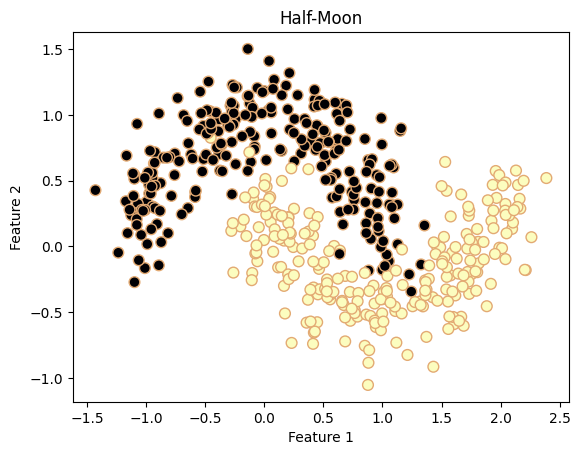

In [16]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=33)

# Display the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='magma', s=60, edgecolor='#e3aa73')
plt.title('Half-Moon')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/home/refulgent/anaconda3/envs/CPE490590/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


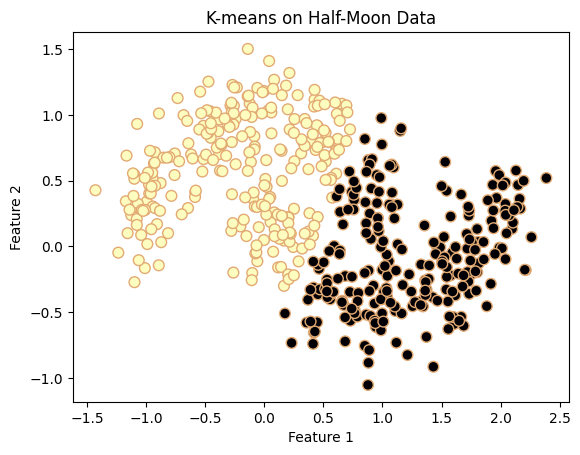

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=99)
cluster_labels = kmeans.fit_predict(X)

# Display the clustering result
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='magma', s=60, edgecolor='#e3aa73')
plt.title('K-means on Half-Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:
from sklearn.metrics import adjusted_rand_score, v_measure_score, silhouette_score, calinski_harabasz_score

ari = adjusted_rand_score(y, cluster_labels)
v_measure = v_measure_score(y, cluster_labels)
silhouette = silhouette_score(X, cluster_labels)
calinski = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski:.5f}")
print(f"Adjusted Rand Index: {ari:.5f}")
print(f"V-measure: {v_measure:.5f}")
print(f"Silhouette Score: {silhouette:.5f}")


Calinski-Harabasz Index: 699.57643
Adjusted Rand Index: 0.25658
V-measure: 0.19554
Silhouette Score: 0.48005
